<a href="https://colab.research.google.com/github/variableVG/CV_project/blob/master/04_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

Data Augmentation is a technique that can be used to artificially expand the size and/or variery of a training dataset by "artificially" creating new data from the existing one. It is a good technique to prevent overfitting, or if the initial dataset is too small. 

In this jupyter notebook we examine some of the techniques that can be used in pytorch for Data Augmentation. These techniques will also be used randomly in the training of the convolutional neural network.


## Data Augmentation techniques
* Geometric transformations: Randomly flip, crop, rotate or translate images.
* Color space transformations: change RGB color channels, intensify any color.
* Kernel filters: sharpen or blur an image.
* Random Erasing: delete a part of the initial image.
* Mixing images: basically, mix images with one another.



Sources:
* https://pytorch.org/vision/stable/transforms.html
* https://towardsdatascience.com/a-comprehensive-guide-to-image-augmentation-using-pytorch-fb162f2444be



In [ ]:
import pandas as pd
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [ ]:
path_to_pictures = '/content/drive/MyDrive/Colab Notebooks/CVNLP/small_pic/'
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/CVNLP/dataset_faces_small.csv'

In [ ]:
df = pd.read_csv(path_to_dataset)

Here we will upload the first picture and examine some techniques for data Augmentation. Data Augmentation will be performed in Jupyter Notebook 06 when getting the training data. 

In [ ]:
# Get picture
path = path_to_pictures + df['filename'][0]
img = Image.open(path).convert('RGB')
tensor_img1 = (T.ToTensor())(img)
print(tensor_img1.shape)

path = path_to_pictures + df['filename'][2]
img = Image.open(path).convert('RGB')
tensor_img2 = (T.ToTensor())(img)



torch.Size([3, 128, 128])


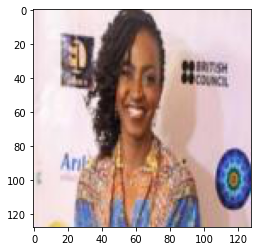

In [ ]:
plt.imshow(tensor_img1.permute(1, 2, 0))

In [ ]:
# Here we defined a function to plot pictures side by side
def plot_pictures_side_by_side(pic1, pic2): 
  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(pic1.permute(1, 2, 0))
  f.add_subplot(1,2, 2)
  plt.imshow(pic2.permute(1, 2, 0))
  plt.show(block=True)

# Crop a picture

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomCrop.html#torchvision.transforms.RandomCrop




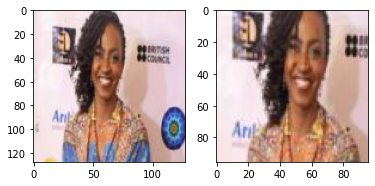

In [ ]:
cropped_picture = (T.RandomCrop(96)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, cropped_picture)

# Randomly flip the images

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip


This function flips the photograph horizontally like a mirror. Flipping the photo vertically does not make much sense since most people's faces do not appear from bottom to top in pictures. However, this could also be done if necessary with RandomVerticalFlip(). 

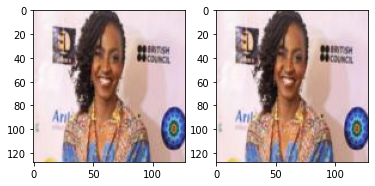

In [ ]:
flipped_picture = (T.RandomHorizontalFlip()) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, flipped_picture)

# Random Perspective
https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomPerspective.html#torchvision.transforms.RandomPerspective

It performs a random perspective transformation of the given image with a given probability. It takes 2 parameters:
* distortion_scale (float) – argument to control the degree of distortion and ranges from 0 to 1. Default is 0.5.
*p (float) – probability of the image being transformed. Default is 0.5.


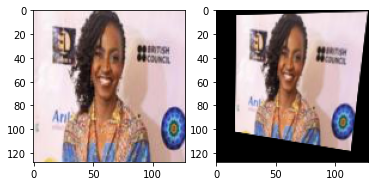

In [ ]:
random_perspective = (T.RandomPerspective(0.4, 1)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_perspective)

# Random Rotation

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomRotation.html#torchvision.transforms.RandomRotation

It rotates the image by angle

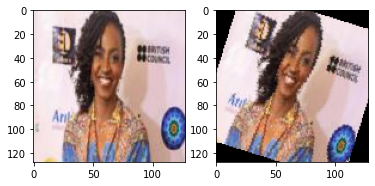

In [ ]:
random_rotation = (T.RandomRotation(30)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_rotation)

# Gaussian Blur

https://pytorch.org/vision/stable/generated/torchvision.transforms.GaussianBlur.html#torchvision.transforms.GaussianBlur

Blurs image with randomly chosen Gaussian blur.

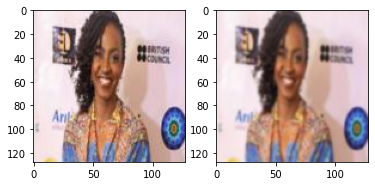

In [ ]:
gaussian_blur = (T.GaussianBlur(55)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, gaussian_blur)

# Random Solarize

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomEqualize.html#torchvision.transforms.RandomEqualize

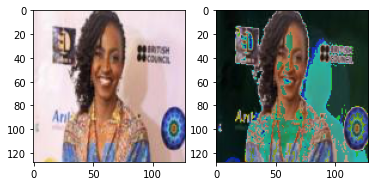

In [ ]:
random_solarize = (T.RandomSolarize(0.75, 1)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_solarize)

# Random Equalize

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomAdjustSharpness.html#torchvision.transforms.RandomAdjustSharpness

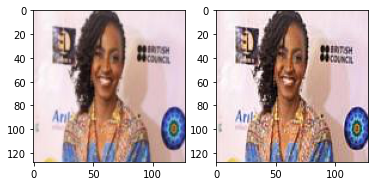

In [ ]:
# Very sharp: sharpness factor = 2
random_sharpness = (T.RandomAdjustSharpness(2, 1)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_sharpness)

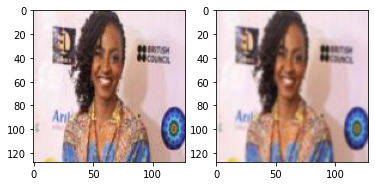

In [ ]:
# Very blurry: sharpness factor = 0
random_sharpness = (T.RandomAdjustSharpness(0, 1)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_sharpness)

# Random Autocontrast

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomAutocontrast.html#torchvision.transforms.RandomAutocontrast

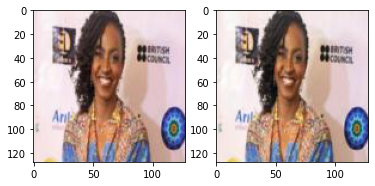

In [ ]:
random_autocontrast = (T.RandomAutocontrast(1)) (tensor_img1)
plot_pictures_side_by_side(tensor_img1, random_autocontrast)

# Gaussian Noise


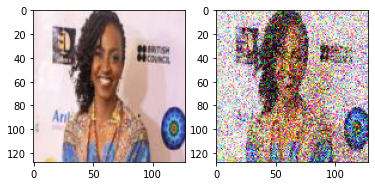

In [ ]:
# create the noise
noise_factor = 0.3
noisy = tensor_img1 + torch.randn_like(tensor_img1) * noise_factor # add the noise to the pic
noisy = torch.clip(noisy,0.,1.)

plot_pictures_side_by_side(tensor_img1, noisy)